# Imports

In [1]:
import numpy as np
from webweb import Web

# Erdos Renyi Random Graph Model

* Sometimes this is called the ER Model for network formation
* Sometimes called $G(n,p)$

Two parameters:
- $n$ is the number of nodes
- $p$ is the probability that any pair of nodes is connected with an edge

# Create a random network

In [14]:
n = 25
p = 0.25

A = np.zeros((n,n))
for i in range(1,n):
    for j in range(i):
        if np.random.rand() < p:
            A[i,j] = 1
            A[j,i] = 1

In [15]:
k = np.sum(A,axis=0)

In [16]:
k

array([7., 4., 4., 7., 5., 5., 6., 5., 8., 7., 8., 6., 4., 6., 6., 5., 7.,
       6., 4., 8., 3., 5., 6., 3., 7.])

In [17]:
np.mean(k)

5.68

In [19]:
np.mean(k**2)

34.4

In [21]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'mean neighbor degree / mean degree')

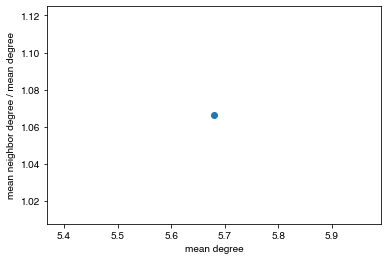

In [24]:
x = np.mean(k)
y = np.mean(k**2)/np.mean(k)/np.mean(k)

fig,ax = plt.subplots(1,1)
ax.scatter(x,y)
ax.set_xlabel('mean degree')
ax.set_ylabel('mean neighbor degree / mean degree')

In [80]:
def incremental_sample_nab(s,na_min=30,na_max=50):    
    # total repertoire size
    pool = 60
    
    # preallocate the array to be returned
    nabs = np.zeros(pool+1)

    # represent the items in the set by ints from 0 to 60, and from 60-s to 120-s
    # In this way, these sets will share s items
    repertoire_a = np.arange(60)
    repertoire_b = np.arange(60-s,120-s)

    # Create random samples from each repertoire
    sampled_a = np.random.choice(repertoire_a,size=na_min,replace=False)
    sampled_b = np.random.choice(repertoire_b,size=na_min,replace=False)

    # Set Diff to get the items that WEREN'T sampled
    unsampled_a = np.setdiff1d(repertoire_a, sampled_a)
    unsampled_b = np.setdiff1d(repertoire_b, sampled_b)

    # Compute the length of the intersection
    nabs[na_min] = len(np.intersect1d(sampled_a,sampled_b,assume_unique=True))

    # Now shuffle the unsampled items so that choosing the last item
    # from each array is equivalent to drawing from the ordered array at random
    np.random.shuffle(unsampled_a) #inplace shuffle
    np.random.shuffle(unsampled_b) #inplace shuffle

    # Iterate over values of na from 31 up to 50, incrementally gaining one more
    # sample each time.
    for na in np.arange(na_min+1,na_max+1):
        # Sample 1 more from a
        sampled_a = np.append(sampled_a,unsampled_a[-1])
        unsampled_a = np.delete(unsampled_a,-1)

        # Sample 1 more from b
        sampled_b = np.append(sampled_b,unsampled_b[-1])
        unsampled_b = np.delete(unsampled_b,-1)

        # Compute new intersection size
        nabs[na] = len(np.intersect1d(sampled_a,sampled_b,assume_unique=True))

    return nabs

In [101]:
incremental_sample_nab(60,30,60)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., 16., 18., 19., 21., 22., 23., 24., 25., 26.,
       27., 28., 30., 31., 33., 35., 37., 38., 40., 41., 41., 43., 45.,
       47., 48., 49., 50., 52., 54., 56., 58., 60.])

In [51]:
np.random.choice(sampled_a)

ValueError: a must be 1-dimensional or an integer